
# Visualizeation and Comparison
## Introduction
In this snippet, I will read the energy consumption data of two companies' bills, and will try to visualize it through seaborn, which is built on matplotlib.pyplot library.
</br>
The data are preprocessed, considering their different amount and timing of energy each company consumed. Notice that the cost of electricity varies proportional to the energy demand hourly.
</br>
## Description
Both companies are in their early stages, and they cannot produce more than 10% of their capacity.
<br/>
Data are recorded in varied period of time. Thus, the data analysed into daily, thenafter, they converted into monthly.
<br/>
Axis ranges are equal to avoid misinterpretation.

/tmp/ipykernel_59932/4152476120.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


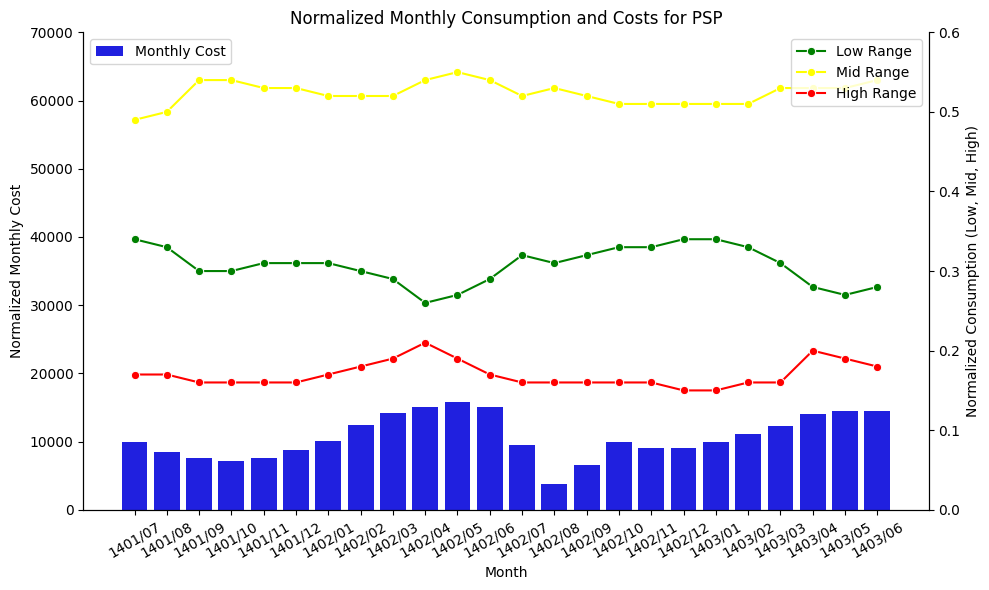

/tmp/ipykernel_59932/4152476120.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)


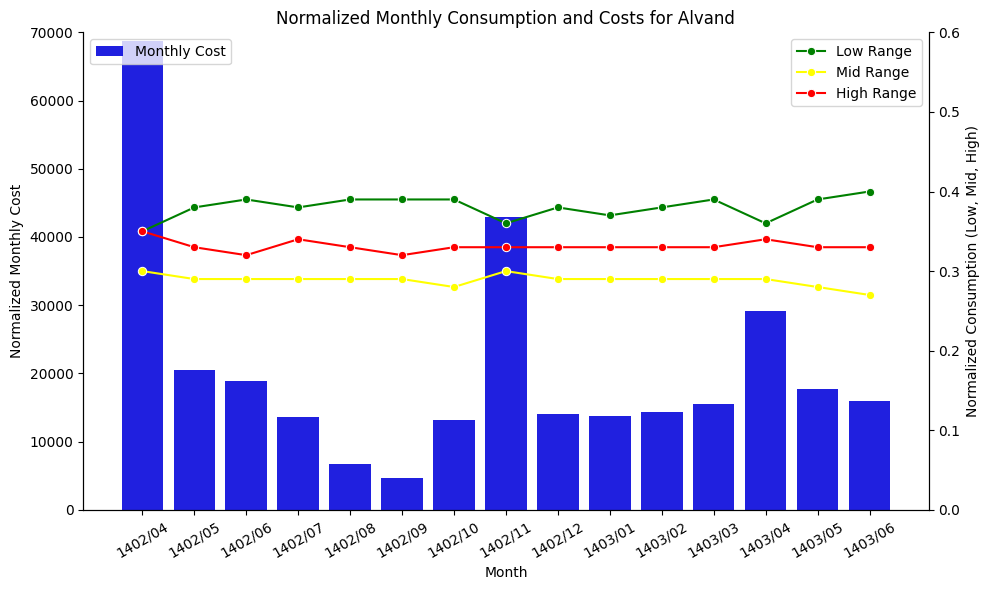

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = 'normalized_monthly_data_both_company.xlsx'
sheet1_data = pd.read_excel(file_path, sheet_name='Data_PSP_normalized')
sheet2_data = pd.read_excel(file_path, sheet_name='Data_Alvand_normalized')

# Define a function to create the plot for each sheet
def plot_normalized_data(data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Normalized_Monthly_Cost as a bar chart
    sns.barplot(data=data, x="Month", y="Normalized_Monthly_Cost", ax=ax1, color="blue", label="Monthly Cost")
    ax1.set_ylabel("Normalized Monthly Cost")
    ax1.set_ylim(0, 70000)  # Set y-axis limit for monthly cost
    ax1.set_xlabel("Month")

    # Create a secondary y-axis for normalized consumption
    ax2 = ax1.twinx()
    sns.lineplot(data=data, x="Month", y="Normalized_Low", ax=ax2, label="Low Range", color="green", marker="o")
    sns.lineplot(data=data, x="Month", y="Normalized_Mid", ax=ax2, label="Mid Range", color="yellow", marker="o")
    sns.lineplot(data=data, x="Month", y="Normalized_High", ax=ax2, label="High Range", color="red", marker="o")
    ax2.set_ylabel("Normalized Consumption (Low, Mid, High)")
    ax2.set_ylim(0, 0.6)  # Set y-axis limit for consumption

    # Title and legends
    plt.title(title)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Adjust month labels and remove plot border
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30) 
    sns.despine(left=False, right=False, top=True, bottom=False)  # Remove borders around the chart

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot for each sheet
plot_normalized_data(sheet1_data, "Normalized Monthly Consumption and Costs for PSP")
plot_normalized_data(sheet2_data, "Normalized Monthly Consumption and Costs for Alvand")
